# Visualization with seaborn


#### Data Description

To complete your homework, you must use the `vgsales.csv` dataset, the download of which will be given below. This dataset contains information about the total sales of video games for video game consoles. Description of signs:
* `Rank` - the serial number of the record in the dataset.
* `Name` is the name of the game.
* `Platform` is the platform for which the game was released (Nintendo, PlayStation, XBox and others).
* `Year` is the year the game was released.
* `Genre` — game genre.
* `Publisher` - the name of the publisher of the game.
* `NA_Sales` - sales of the game in North America, million copies.
* `EU_Sales` - sales of the game in Europe, million copies.
* `JP_Sales` - sales of the game in Japan, million copies.
* `Other_Sales` - sales of the game in other countries, million copies.
* `Global_Sales` - sales of the game worldwide, million copies.



In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('vgsales.csv')
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


###  1

Plot a line graph for the sales volume of all sports games in Japan. Set the graphics size to 12 by 6.


Text(0.5, 1.0, 'Sales volume chart for all Sports games in Japan')

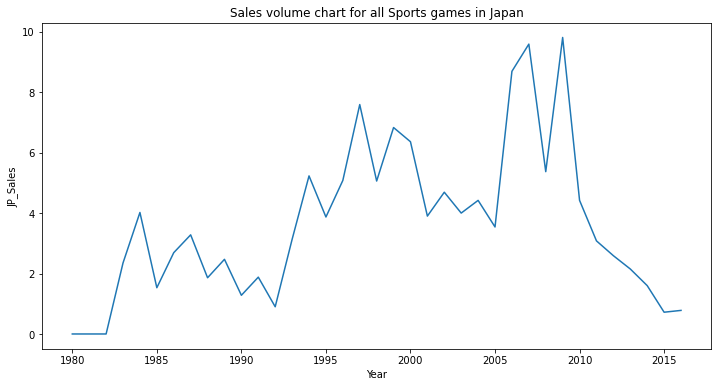

In [3]:
data = df[df['Genre'] == 'Sports'].groupby('Year').sum()

fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.lineplot(data=data, x='Year', y='JP_Sales')

ax.set_title('Sales volume chart for all Sports games in Japan')


###  2

Plot line charts of Activision sales in North America, Europe, Japan, and worldwide using the same coordinate axes.


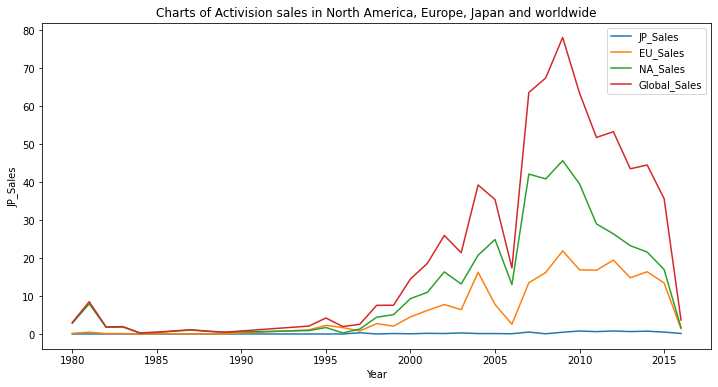

In [4]:
fig, axs = plt.subplots(figsize=(12,6))

data1 = df[df['Publisher'] == 'Activision'].groupby('Year').sum()
sales = ['JP_Sales', 'EU_Sales', 'NA_Sales', 'Global_Sales']
for i, el in enumerate(sales):
    axs = sns.lineplot(data=data1, x='Year', y=el, label=el)
    axs.legend()
    axs.set_title('Charts of Activision sales in North America, Europe, Japan and worldwide')


###  3

In a loop (i.e., on different coordinate axes), build line graphs of Activision's sales dynamics in North America, Europe, Japan, and worldwide.


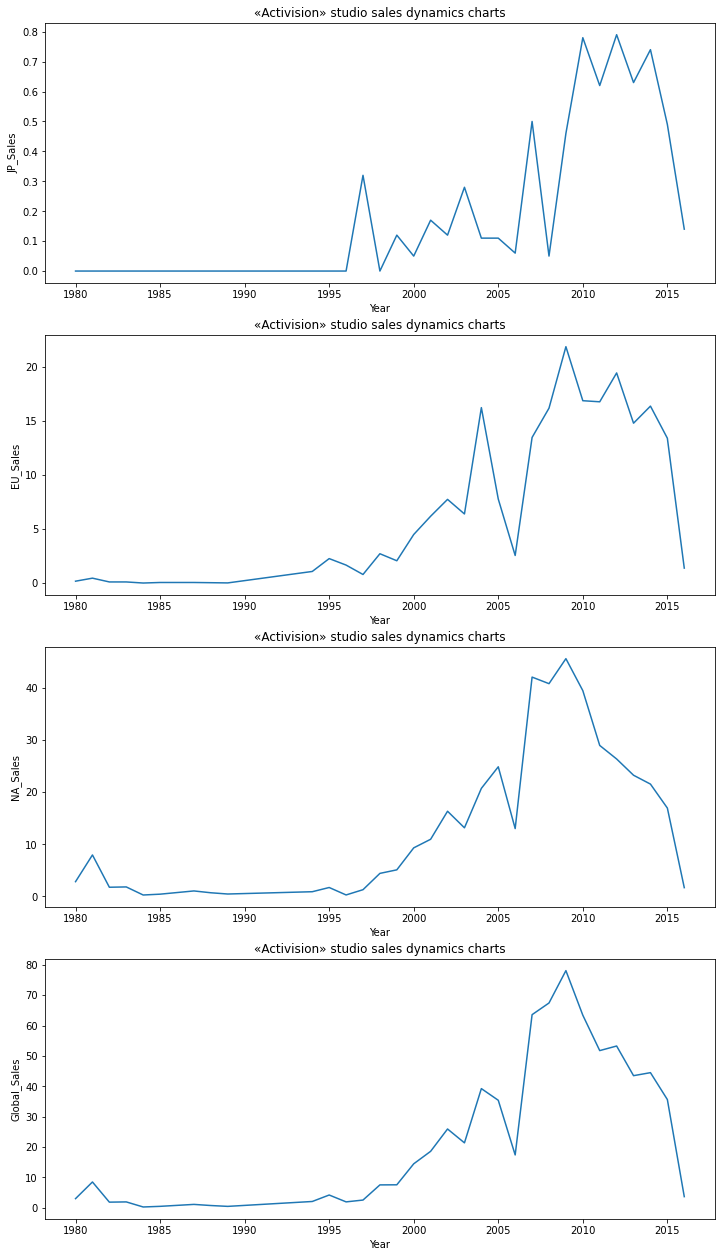

In [6]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 22))
sales_list = ['JP_Sales', 'EU_Sales', 'NA_Sales', 'Global_Sales']

for i, el in enumerate(sales_list):
    data2 = df[df['Publisher'] == 'Activision'].groupby('Year')[el].sum()
    sns.lineplot(data=data2, ax=ax[i]).set(title='«Activision» studio sales dynamics charts')

###  4

Build a PairPlot for all numerical features of the dataset. Specify colors for different platforms in different colors.

Note: pandas may issue warnings when plotting this graph, this behavior is acceptable in this problem.

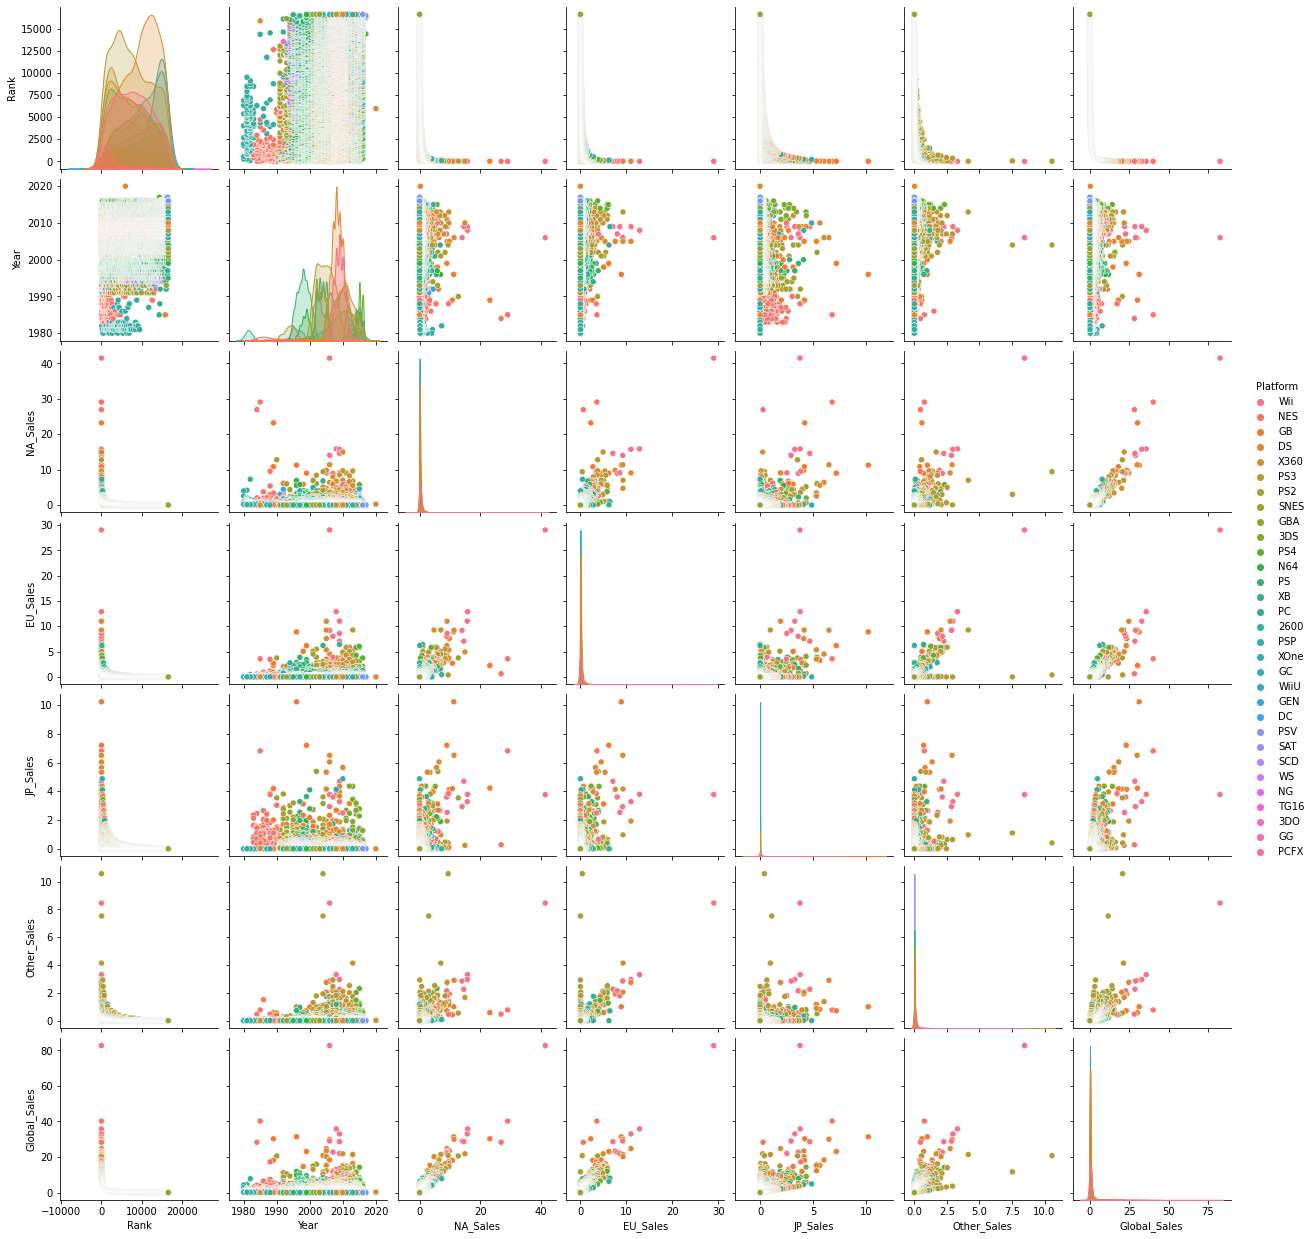

In [40]:
sns.pairplot(df, hue='Platform')

###  5

On the same grid, plot 2 histograms of the distribution of worldwide game sales by publishers Microsoft Game Studios and Take-Two Interactive since 2010 (including 2010). Make the graphs translucent, cutoffs should be common and match the width of the columns of both graphs.


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
62,63,Halo: Reach,X360,2010.0,Shooter,Microsoft Game Studios,7.03,1.98,0.08,0.78,9.88
...,...,...,...,...,...,...,...,...,...,...,...
13916,13918,Civilization Beyond Earth: Rising Tide,PC,2015.0,Strategy,Take-Two Interactive,0.00,0.04,0.00,0.00,0.04
14411,14414,NBA 2K13,PC,2012.0,Sports,Take-Two Interactive,0.00,0.02,0.00,0.00,0.03
14619,14622,Triple Pack: Xbox Live Arcade Compilation,X360,2011.0,Misc,Microsoft Game Studios,0.03,0.00,0.00,0.00,0.03
15801,15804,XCOM 2,XOne,2016.0,Strategy,Take-Two Interactive,0.01,0.01,0.00,0.00,0.02


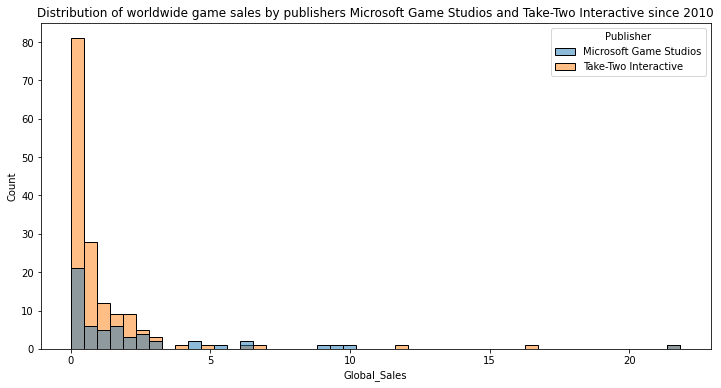

In [7]:
publishers = ['Microsoft Game Studios', 'Take-Two Interactive']
df1 = df[(df['Publisher'].isin(publishers)) & (df['Year'] >= 2010)]

fig, ax = plt.subplots(figsize = (12,6))
sns.histplot(data=df1, x='Global_Sales', hue='Publisher', alpha=0.5).set(title='Distribution of worldwide game sales by publishers Microsoft Game Studios and Take-Two Interactive since 2010')
df1

###  6

Plot a line graph of the evolution of the number of games released by Nintendo over the years. Using numpy or pandas, determine the period in which the publisher released more than 35 games each year, and highlight this period of time with a green translucent rectangle.


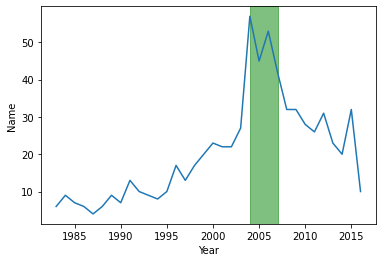

In [8]:
df2 = df[df['Publisher'] == 'Nintendo'].groupby('Year')['Name'].count().reset_index()
min_year = df2[df2['Name'] > 35]['Year'].min()
max_year = df2[df2['Name'] > 35]['Year'].max()

fig, ax = plt.subplots()
ax = sns.lineplot(data=df2, x='Year', y='Name')
ax.axvspan(xmin=min_year, xmax=max_year, color='green', alpha = .5)

###  7

Identify the 3 genres and 4 platforms with the biggest game sales in the world of all time. Build a 4 by 3 grid of graphs, in each cell, build a scatter plot that checks the dependence of global sales on sales in North America for each pair (genre, platform). Indicate games of different years in different colors. Determine the size of the final canvas yourself so that all the graphs are visible.



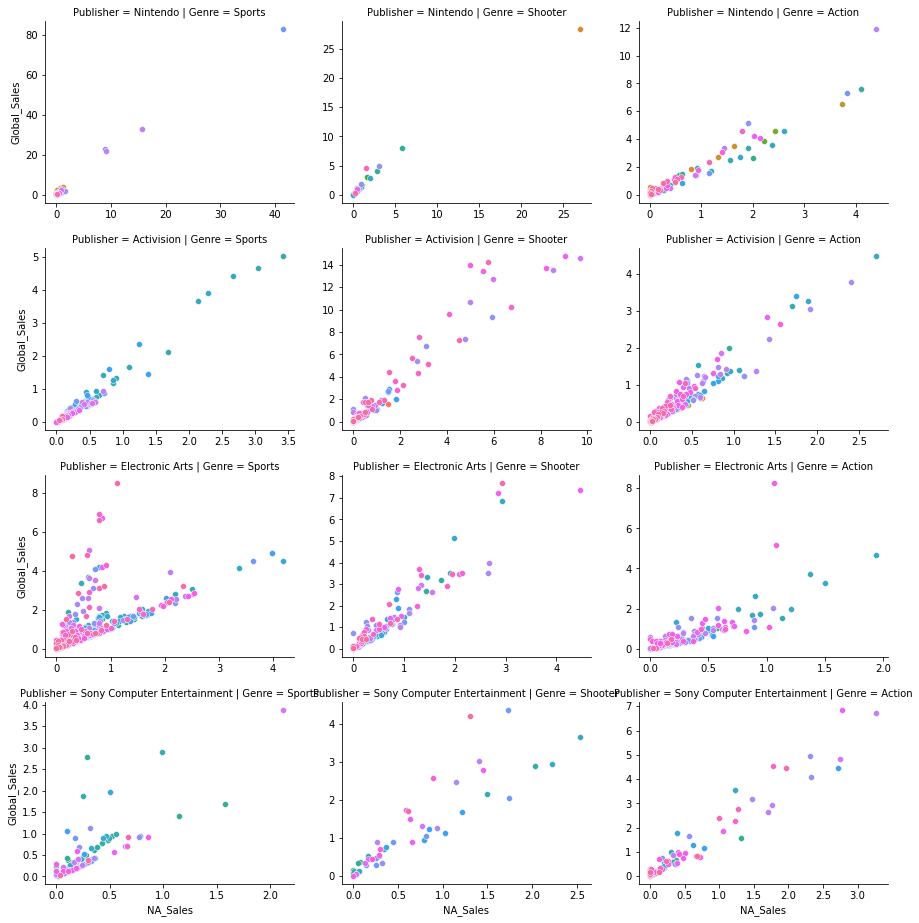

In [9]:
genres_list = ['Action', 'Sports', 'Shooter']
publishers_list = ['Nintendo', 'Electronic Arts', 'Activision', 'Sony Computer Entertainment']

df = df[df['Genre'].isin(genres_list)]
df = df[df['Publisher'].isin(publishers_list)]

h = sns.FacetGrid(data=df, row='Publisher', col='Genre', sharex=False, sharey=False, hue='Year')
h.map(sns.scatterplot, 'NA_Sales', 'Global_Sales')
h.fig.set_size_inches(13,13)